<a href="https://colab.research.google.com/github/takam1602/zeroPython/blob/main/Chapter4_Koch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
a = [1,2,3]
b = a

In [7]:
a
b

[1, 2, 3]

In [8]:
b


[1, 2, 3]

In [9]:
b = [4,5,6]

In [10]:
def func(a):
  a[1]  = 5

a =[1,2,3]
func(a)
print(a)

[1, 5, 3]


In [11]:
source = [0,1,2]
result = []
for i in source:
  result.append(i*2)

result 

[0, 2, 4]

In [12]:
from math import sqrt
from PIL import Image,ImageDraw

def length(a):
  x,y = 0,0
  for (dx,dy) in a:
    x += dx
    y += dy
  return sqrt(x**2+y**2)

a = [(1,0),(0,1)]
length(a)

1.4142135623730951

In [15]:
def convert(a,b):
  ax,ay = a
  alen  = sqrt(ax**2+ay**2)
  c = ax/alen
  s = ay/alen
  scale = alen/length(b)
  b = [(scale*x,scale*y) for (x,y) in b]
  b = [(c*x - s*y,s*x+c*y)for (x,y) in b]
  return b

In [16]:
a = (0,1)
b = [(1,1),(1,-1)]
convert(a,b)

[(-0.5, 0.5), (0.5, 0.5)]

In [17]:
def apply(a,b):
  r = []
  for i in a:
    r+=convert(i,b)
  return r

In [18]:
a = [(1,0),(0,-1)]
b = [(1,1),(1,-1)]
apply(a,b)

[(0.5, 0.5), (0.5, -0.5), (0.5, -0.5), (-0.5, -0.5)]

In [20]:
def drawLine(draw,a,size):
  x1,y1 = 0,0
  for (dx,dy) in a:
    x2 = x1 + dx
    y2 = y1 + dy
    draw.line((x1,size/2 - y1,x2,size/2 - y2),fill = (255,0,0))
    x1,y1 = x2,y2

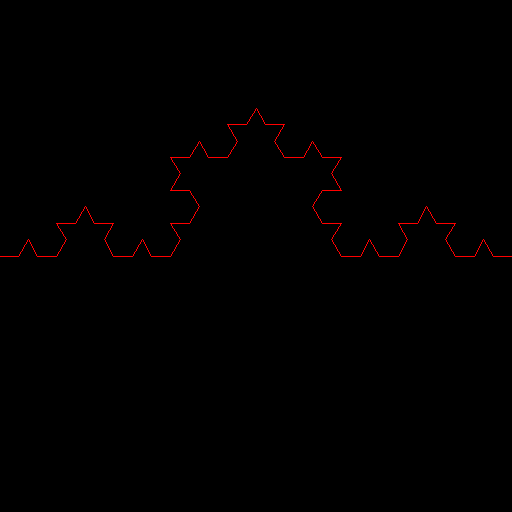

In [29]:
size = 512
N = 3
img = Image.new("RGB",(size,size))
draw = ImageDraw.Draw(img)
a = [(size,0)]
b = [(1,0),(0.5,sqrt(3.0)/2),(0.5,-sqrt(3.0)/2),(1,0)]
for _ in range(N):
  a = apply(a,b)
drawLine(draw,a,size)
img 

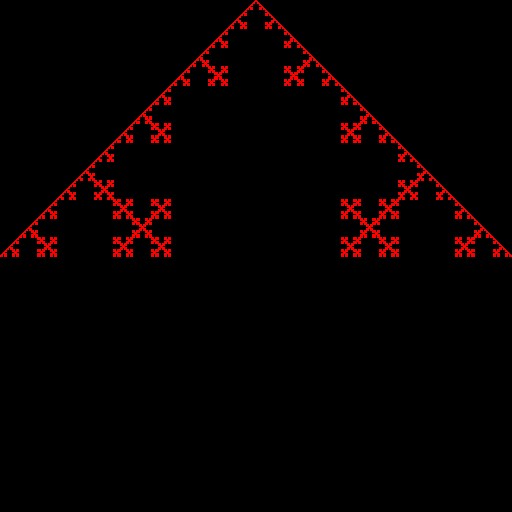

In [36]:
size = 512
N = 6
img = Image.new("RGB",(size,size))
draw = ImageDraw.Draw(img)
a = [(size,0)]
b = [(1,0),(0,1),(1,0),(0,-1),(1,0)]
for _ in range(N):
  a = apply(a,b)
drawLine(draw,a,size)
img 

In [46]:
def drawLineColor(draw,a,colors,size):
  x1,y1 = 0,0
  for i,(dx,dy) in enumerate(a):
    x2 = x1 + dx
    y2 = y1 + dy
    c = colors[i%3]
    draw.line((x1,size/2-y1,x2,size/2 - y2),fill= c)
    x1,y1 = x2,y2

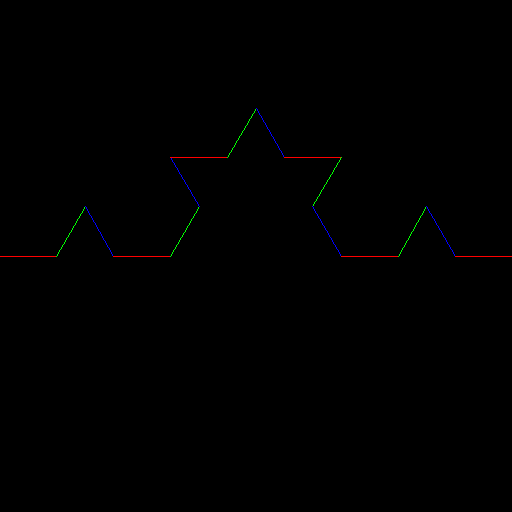

In [48]:
size = 512
N = 2
img = Image.new("RGB",(size,size))
draw = ImageDraw.Draw(img)
a = [(size,0)]
b = [(1,0),(0.5,sqrt(3.0)/2),(0.5,-sqrt(3.0)/2),(1,0)]
c = [(255,0,0),(0,255,0),(0,0,255)]
for _ in range(N):
  a = apply(a,b)
drawLineColor(draw,a,c,size)
img 